# NOTEBOOK TO COMPUTE EMOTION AND SENTIMENT CLASSIFICATION ON THE IMMIGRATION-RELATED TWEETS

In [14]:
#!pip install -U feel-it

import pandas as pd
import matplotlib.pyplot as plt
from feel_it import EmotionClassifier, SentimentClassifier

In [2]:
emotion_classifier = EmotionClassifier()
sentiment_classifier = SentimentClassifier()

In [7]:
relevant_tweets = pd.read_csv('all_topics.csv')

relevant_tweets

,Doc,Topic,Doc_ID
0,Centinaia di italiani che vivono e lavorano a ...,122,463
1,Il governo ha bloccato il Parlamento per aprir...,122,728
2,⚠️Divieto di spostamento tra regioni dal 20 di...,122,858
3,#Salvini: Ancora troppi gli italiani dimentica...,122,1057
4,Vedendo quanto sta accadendo ora grazie a Cont...,122,1068
...,...,...,...
1534,L'intervento in Libia ha peggiorato la situazi...,123,37493
1535,"Sul Corriere denuncia di Tripoli: ""Sbarchi dal...",123,37763
1536,Altri 556 immigrati raccolti da navi militari ...,123,38238
1537,Le cosche guadagnano sugli #immigrati: marina ...,123,38256


In [8]:
#here we create a dictionary with the sentiment and emotion of each relevant tweet by fitting the model to the relevant tweets and storing the predictions in a dictionary that looks like this: {tweet: {"sentiment": sentiment, "emotion": emotion}}

sentiment_emotion_dict = {}
for tweet in relevant_tweets['Doc']:
    sentiment_emotion_dict[tweet] = {"sentiment": sentiment_classifier.predict([tweet])[0], "emotion": emotion_classifier.predict([tweet])[0]}

In [9]:
#print the dictionary as a dataframe
df = pd.DataFrame(sentiment_emotion_dict).T
df.head(10)

,sentiment,emotion
"Centinaia di italiani che vivono e lavorano a Londra e nel Regno Unito, dopo aver fatto costosi tamponi, sono stati bloccati e abbandonati mentre erano già in aeroporto, con carta d'imbarco in mano e in attesa del volo. (1/2) https://t.co/M9y2PDPm9C",negative,sadness
"Il governo ha bloccato il Parlamento per aprire porti e riaccendere il business dell’immigrazione clandestina, ma non trova il tempo per i più di 20mila giovani medici che da metà ottobre attendono di sapere dove potranno iniziare la specializzazione.",negative,sadness
"⚠️Divieto di spostamento tra regioni dal 20 dicembre al 6 gennaio, #patrimoniale su casa e risparmi, Camera impegnata nel riaprire porti e portafogli per il business dell'immigrazione clandestina. Da Lega e centrodestra battaglia giorno e notte per fermare il #Decretoclandestini. https://t.co/h1Z5W2aWuT",negative,anger
#Salvini: Ancora troppi gli italiani dimenticati: disabili senza l'assistenza dovuta e anziani chiusi in casa. Cerchiamo di rispondere alle loro richieste di aiuto. #ore14rai2,negative,sadness
"Vedendo quanto sta accadendo ora grazie a Conte, con sbarchi senza fine, cancellazione dei Decreti sicurezza e ripartenza del business dell'immigrazione clandestina, ci vado ancor di più A TESTA ALTA!",negative,anger
"Che vergogna. Per i clandestini zona verde, grazie a questo governo la mangiatoia del business dell’immigrazione clandestina è ripartita a pieno regime. https://t.co/otaopxQoh2",negative,anger
"🔴 Quasi 30mila sbarchi, oltre 12 mila tunisini. Gli italiani in casa, bar, ristoranti e negozi chiusi. Porti e confini aperti a clandestini e finti richiedenti asilo che non fuggono da nessuna guerra. Questa è l’Italia di Conte, PD e 5 Stelle. https://t.co/kkPltZZ0mR",negative,anger
847 immigrati ieri. 114 solo questa notte. 2.241 da domenica. E la settimana prossima Pd e 5Stelle portano in Parlamento la cancellazione dei Decreti Sicurezza. Complici e incoscienti.,negative,anger
"Gli italiani non vogliono parole ma fatti. Da domenica a oggi, sono sbarcati in Italia 1.600 immigrati clandestini (nel video uno di quelli di stamattina). Di che controlli parla il Viminale? Scriveremo a “Chi l’ha Visto?” per avere notizie del ministro Lamorgese. https://t.co/d0kNsLqSn1",negative,anger
"#Salvini: Un'oretta fa sono sbarcati altri cento immigrati a #Lampedusa. Non vedo sui banchi del governo il ministro dell'Interno... Un governo che si appresta a chiudere scuole, uffici e negozi non potrebbe chiudere i porti ai clandestini? È così difficile? #Senato",negative,anger


In [10]:
#count how many tweets have a a certain emotion
df["emotion"].value_counts()

emotion
anger      1247
sadness     118
joy         115
fear         59
Name: count, dtype: int64

In [11]:
#percentage of tweets with a certain emotion

df["emotion"].value_counts(normalize=True)*100


emotion
anger      81.026641
sadness     7.667316
joy         7.472385
fear        3.833658
Name: proportion, dtype: float64

In [12]:
#count how many tweets have a positive sentiment
df["sentiment"].value_counts()

sentiment
negative    1427
positive     112
Name: count, dtype: int64

In [13]:
#percentage
df["sentiment"].value_counts(normalize=True)*100

sentiment
negative    92.722547
positive     7.277453
Name: proportion, dtype: float64

# PIE CHART FOR EMOTION AND SENTIMENT

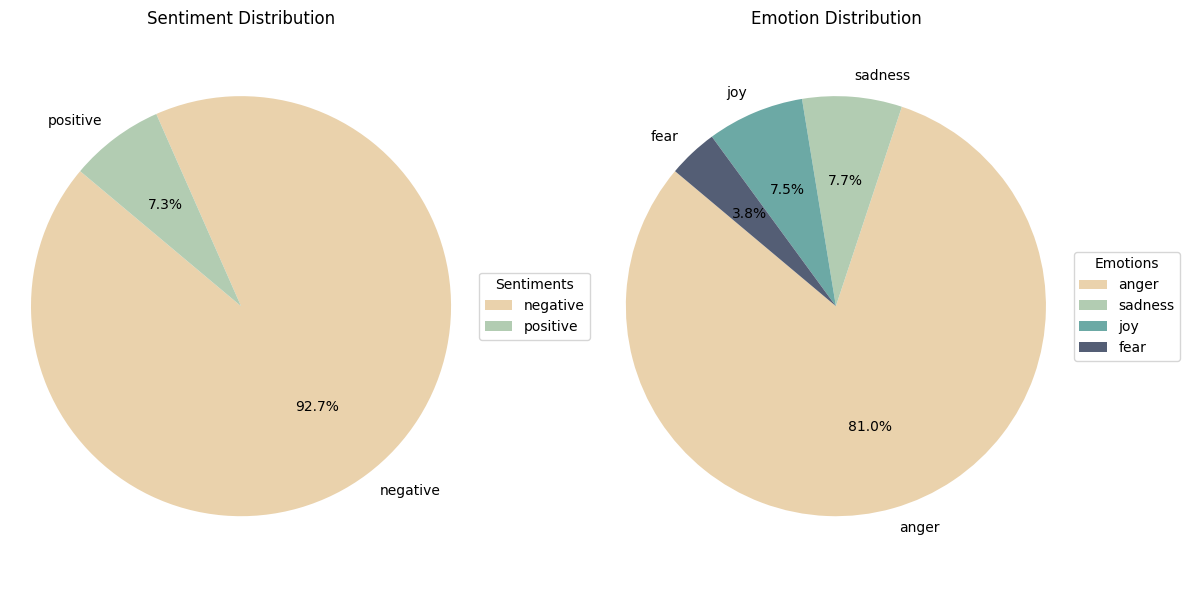

In [18]:
emotion_counts = df["emotion"].value_counts(normalize=True) * 100

sentiment_counts = df["sentiment"].value_counts(normalize=True) * 100

# Set colors for emotions
colors_emotion = ['#EAD2AC', '#B2CCB2', '#6CA9A5', '#545E75']

# Plotting pie chart for sentiment distribution
plt.figure(figsize=(12, 6))  # Larger figure size to accommodate both charts
plt.subplot(1, 2, 1)  # Subplot 1 of a 1x2 grid (left side)
wedges_sentiment, _, autotexts_sentiment = plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_emotion)
plt.title('Sentiment Distribution')
plt.axis('equal')

# Add legend for sentiment
plt.legend(wedges_sentiment, sentiment_counts.index, title="Sentiments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plotting pie chart for emotion distribution
plt.subplot(1, 2, 2)  # Subplot 2 of a 1x2 grid (right side)
wedges_emotion, _, autotexts_emotion = plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=colors_emotion, startangle=140)
plt.title('Emotion Distribution')
plt.axis('equal')

# Add legend for emotion
plt.legend(wedges_emotion, emotion_counts.index, title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined plot as an image
plt.savefig('sentiment_and_emotion_pie_charts_with_legends.png', dpi=300, bbox_inches='tight')

# Display the combined plot
plt.show()
